In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("advertising-1.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:ylabel='Clicked on Ad'>

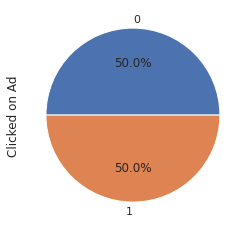

In [7]:
df["Clicked on Ad"].value_counts().plot(kind='pie',autopct='%1.1f%%')

No class imbalance 

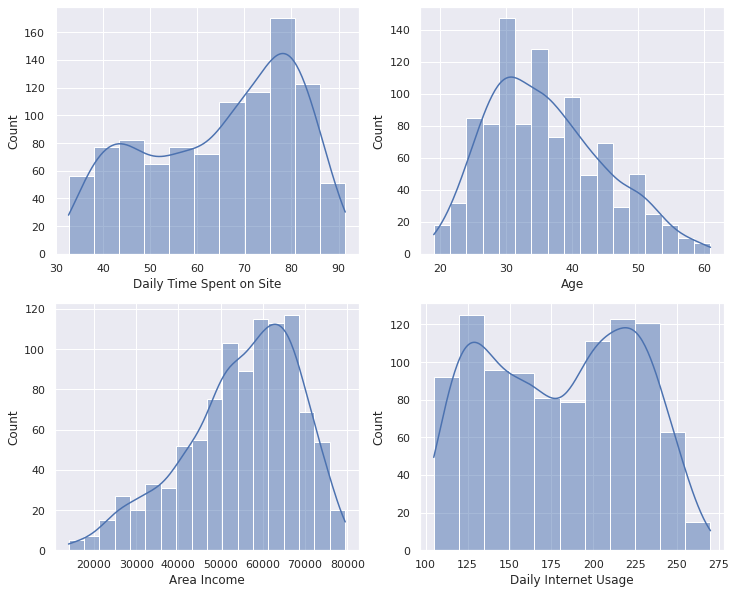

In [8]:
# Data distribution of numerical columns
num_cols=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
sns.set(style="darkgrid")
fig = plt.figure(figsize=(12,10))
c=1
for cols in num_cols:
    plt.subplot(2, 2,c)
    plt.xlabel(cols)
    sns.histplot(df[cols],kde=True)
    c+=1
plt.show()




### Feature Engineering

1. Using the 'Country' feature to create a new Continent feature by assigning continents to all the countries
2. Deriving Month and hour feature from the timestamp data

In [9]:
df["Country"].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [10]:
df["City"].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

In [11]:
country=list(df["Country"].unique())

In [12]:
pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 87.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 kB 47.2 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=3f3d050d1fc2d5615ae8bd8477dcaecfa1f1fa663285bcbc6335f0c5ec970a00
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
  Attempting uninstall: attrs
    Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0
ERROR: pip's dependency resolver does not currently take into account all the pa

In [13]:
import pycountry_convert as pc
def invalid_country_names(country_name):
    invalid=[]
    
    for c in country_name:
        try:
            pc.country_name_to_country_alpha2(c)
        except:
            invalid.append(c)
    return invalid
invalid_country=invalid_country_names(country)
invalid_country

['Palestinian Territory',
 'British Indian Ocean Territory (Chagos Archipelago)',
 'Korea',
 'Bouvet Island (Bouvetoya)',
 'Saint Helena',
 'Svalbard & Jan Mayen Islands',
 "Cote d'Ivoire",
 'Antarctica (the territory South of 60 deg S)',
 'Pitcairn Islands',
 'Libyan Arab Jamahiriya',
 'Saint Barthelemy',
 'Reunion',
 'Netherlands Antilles',
 'Slovakia (Slovak Republic)']

In [14]:
#Correcting the names of countries to match the pycountry country list
df['Country'].replace('Palestinian Territory','Palestine',inplace=True)
df['Country'].replace('Korea','South Korea',inplace=True)
df['Country'].replace('Slovakia (Slovak Republic)','Slovakia',inplace=True)

#### Implementing sklearn pipeline(Feature Engineering)

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

In [16]:
class CountrytoContinent(BaseEstimator, TransformerMixin):
    def __init__(self,country):
        self.country = country
    
    def fit(self,X,y=None):
        return self
      
    def continent_country(self,country_name):
    
        try:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name)
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name

        except:
            return "Others"
    
    def transform(self,X,y=None):
        X["Continent"]=X[self.country].apply(self.continent_country)
        return X
        
class MonthHour(BaseEstimator, TransformerMixin):
    def __init__(self,timestamp):
        self.timestamp = timestamp
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X['Month'] = [int(val[5:7]) for val in X[self.timestamp]]
        X['Hour'] = [int(val[11:13]) for val in X[self.timestamp]]
        return X

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns = columns
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X.drop(X[self.columns],axis=1,inplace=True)
        return X
    

In [17]:
from sklearn.pipeline import Pipeline
column_transformer = Pipeline(steps=[
    ('CountrytoContinent', CountrytoContinent('Country')),
    ('MonthHour', MonthHour('Timestamp')),
    ('DropColumns', DropColumns(['Ad Topic Line','Country','City','Timestamp'])),
])

In [18]:
column_transformer.fit_transform(df)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Continent,Month,Hour
0,68.95,35,61833.90,256.09,0,0,Africa,3,0
1,80.23,31,68441.85,193.77,1,0,Oceania,4,1
2,69.47,26,59785.94,236.50,0,0,Europe,3,20
3,74.15,29,54806.18,245.89,1,0,Europe,1,2
4,68.37,35,73889.99,225.58,0,0,Europe,6,3


In [19]:
#savimg the transformer
import joblib
joblib.dump(column_transformer, "data_transformer.joblib")

['data_transformer.joblib']

## EDA

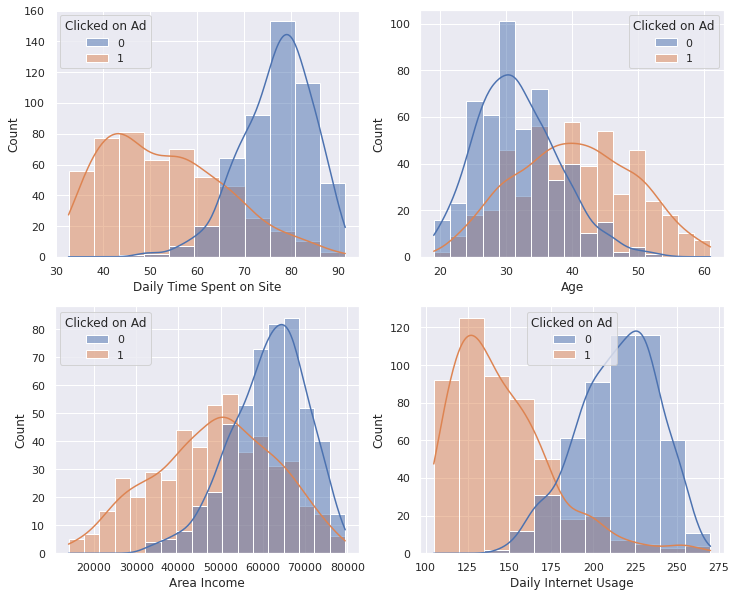

In [20]:
# Data distribution of numerical columns w.r.t target column
num_cols=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
sns.set(style="darkgrid")
fig = plt.figure(figsize=(12,10))
c=1
for cols in num_cols:
    plt.subplot(2, 2,c)
    plt.xlabel(cols)
    sns.histplot(data=df,x=cols,kde=True,hue="Clicked on Ad")
    c+=1
plt.show()

The histograms clearly show that the numerical features have a good separation between the two classes with some overlap.

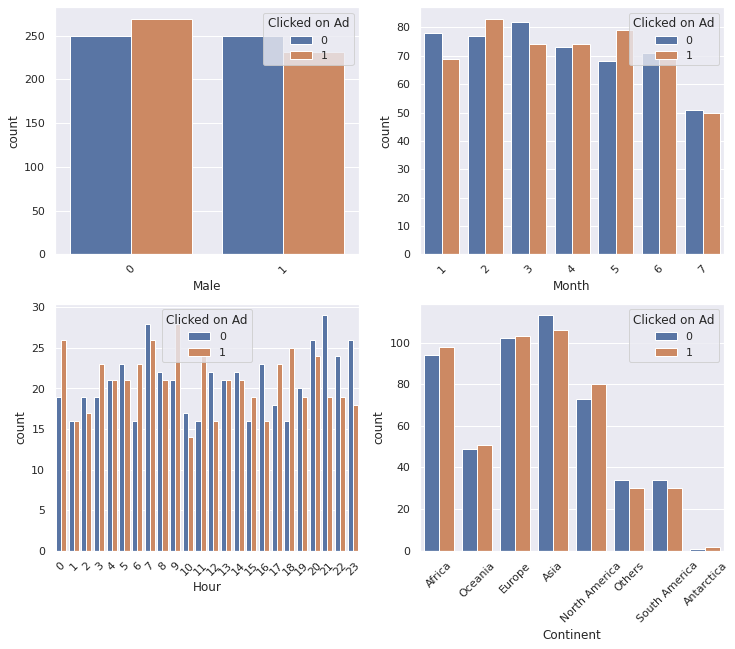

In [21]:
# Data distribution of categorical columns w.r.t target column
cat_cols=["Male","Month","Hour","Continent"]
sns.set(style="darkgrid")
fig = plt.figure(figsize=(12,10))
c=1
for cols in cat_cols:
    plt.subplot(2, 2,c)
    plt.xlabel(cols)
    plt.xticks(rotation=45)
    sns.countplot(data=df,x=cols,hue="Clicked on Ad")
    c+=1
plt.show()

In [22]:
# Correlation of the target variable with independent variables
np.absolute(df.corr()["Clicked on Ad"]).sort_values(ascending = False)

Clicked on Ad               1.000000
Daily Internet Usage        0.786539
Daily Time Spent on Site    0.748117
Age                         0.492531
Area Income                 0.476255
Hour                        0.047431
Male                        0.038027
Month                       0.016095
Name: Clicked on Ad, dtype: float64

"Daily time spent on site" and "Daily Internet Usage" have very high predictive power.

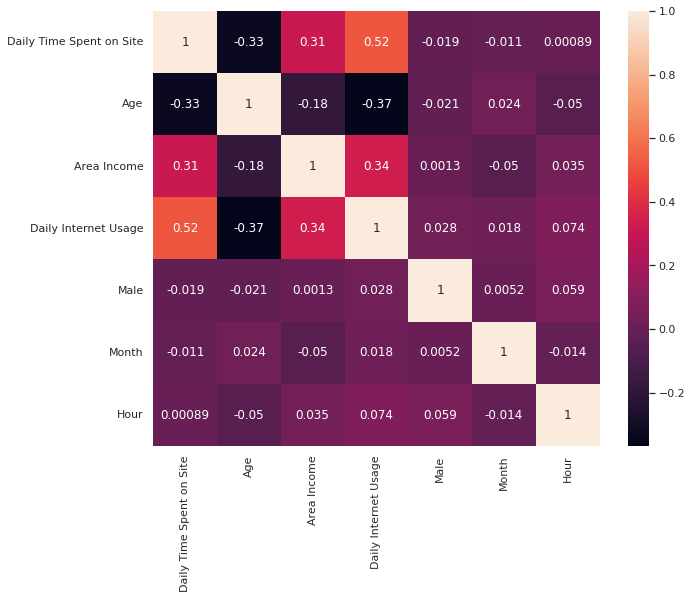

In [23]:
# heatmap to look for multi-colinearity
fig = plt.figure(figsize=(10,8))
sns.heatmap(data=df.drop("Clicked on Ad",axis=1).corr(),annot=True)
plt.show()

1. "Daily time spent on site" and "Daily Internet Usage" are positively correlated which makes sense.
2. "Age" is negatively corelated with "Daily time spent on site" and "Daily Internet Usage" which means older people do not spend much time on the internet.
3. "Area Income" is positively correlated with "Daily time spent on site" and "Daily Internet Usage" . This maybe because low incrome areas will not have much access to the internet as compared to high income areas.

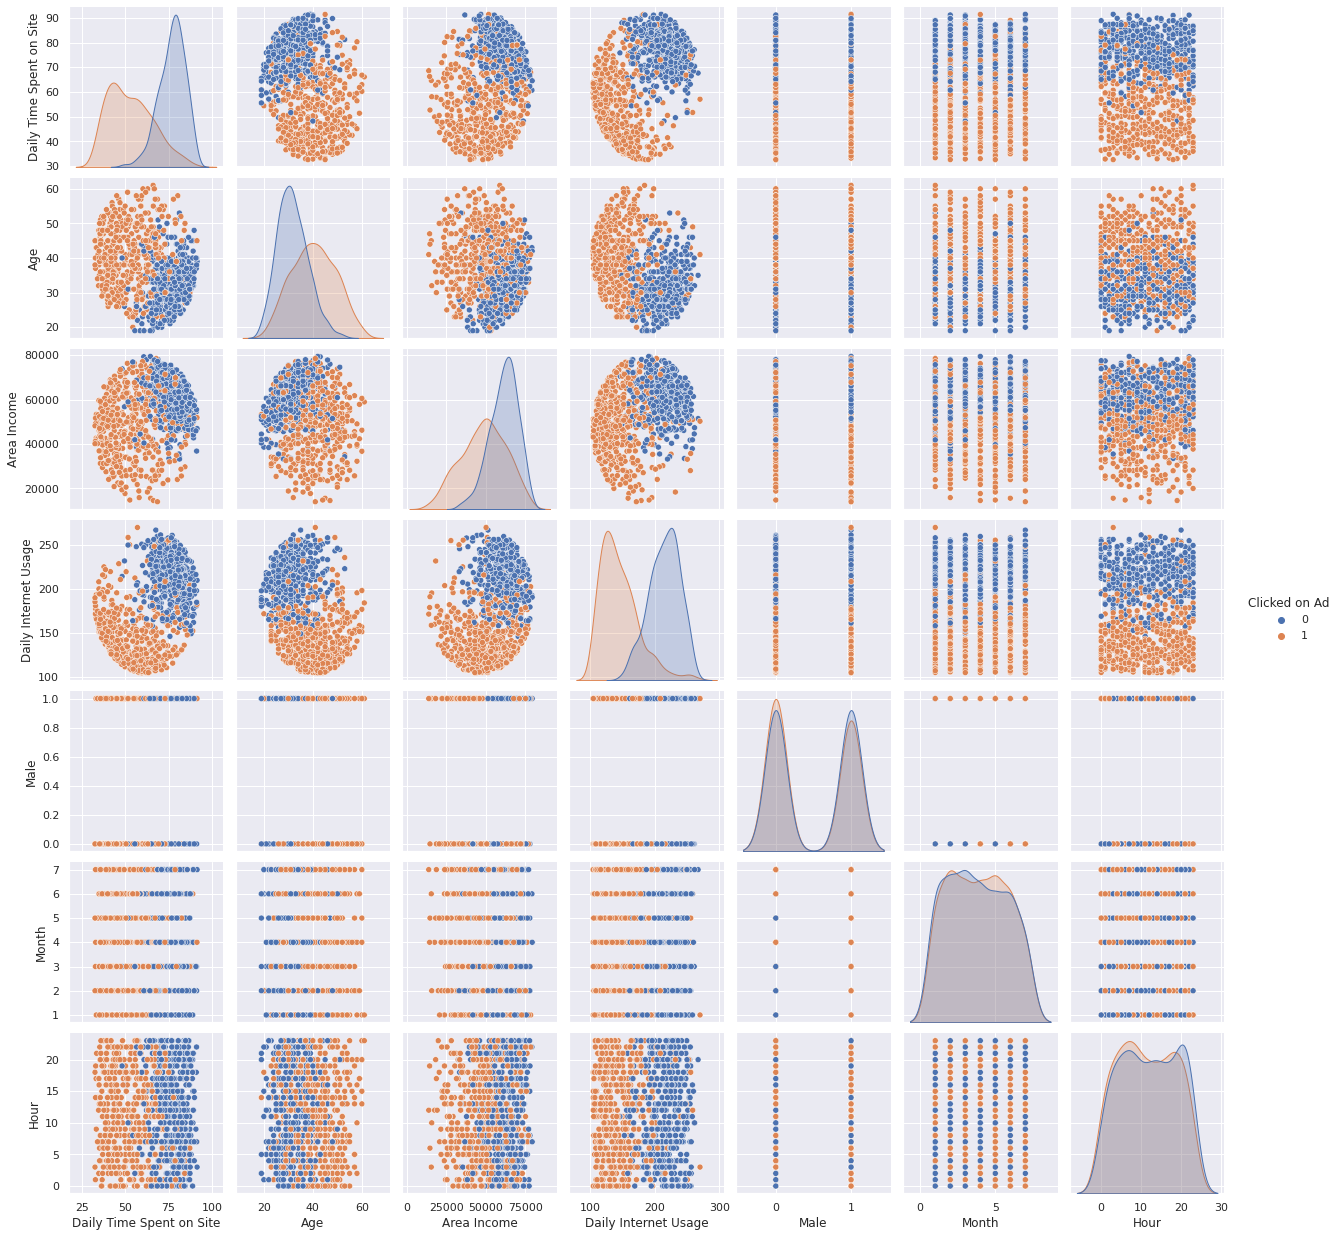

In [69]:
#Visualising relationship between all features
sns.pairplot(data=df,hue="Clicked on Ad")
plt.show()

### Model Building

In [24]:
y=df["Clicked on Ad"].values
x=df.drop("Clicked on Ad",axis=1)
# Encoding the categorical variables
encoding_transformer = ColumnTransformer([
    ('Encoder', OneHotEncoder(sparse=False),["Continent","Month","Hour"])],remainder ='passthrough')
x=encoding_transformer.fit_transform(x)

In [25]:
joblib.dump(encoding_transformer, "encoding_transformer.joblib")

['encoding_transformer.joblib']

In [26]:
#Splitting the data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape

(800, 44)

In [28]:
x_test.shape

(200, 44)

In [29]:
# Scaling the data for better convergence
scaler_transformer = Pipeline(steps=[
    ('Scaler', MinMaxScaler()),
])
x_train=scaler_transformer.fit_transform(x_train)
x_test=scaler_transformer.transform(x_test)

In [30]:
joblib.dump(scaler_transformer, "scaler_transformer.joblib")

['scaler_transformer.joblib']

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
# Model architecture
model=Sequential()
model.add(Dense(10,input_shape=(44,),activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation= 'sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                450       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stp = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
#saving the model with the best metric
mdl_save= ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [37]:
history=model.fit(
    x_train,
    y_train,
    
    epochs=200,
    verbose=1,
    callbacks=[early_stp,mdl_save],
    validation_split=0.1,
)

Epoch 1/200
23/23 [==============================] - 3s 27ms/step - loss: 0.6881 - accuracy: 0.5875 - val_loss: 0.6805 - val_accuracy: 0.6125
Epoch 2/200
23/23 [==============================] - 0s 12ms/step - loss: 0.6737 - accuracy: 0.6125 - val_loss: 0.6682 - val_accuracy: 0.6625
Epoch 3/200
23/23 [==============================] - 0s 14ms/step - loss: 0.6616 - accuracy: 0.6542 - val_loss: 0.6570 - val_accuracy: 0.7000
Epoch 4/200
23/23 [==============================] - 0s 12ms/step - loss: 0.6474 - accuracy: 0.6792 - val_loss: 0.6409 - val_accuracy: 0.7250
Epoch 5/200
23/23 [==============================] - 0s 17ms/step - loss: 0.6276 - accuracy: 0.7208 - val_loss: 0.6214 - val_accuracy: 0.7500
Epoch 6/200
23/23 [==============================] - 0s 13ms/step - loss: 0.6015 - accuracy: 0.7736 - val_loss: 0.5937 - val_accuracy: 0.7875
Epoch 7/200
23/23 [==============================] - 0s 11ms/step - loss: 0.5679 - accuracy: 0.8167 - val_loss: 0.5600 - val_accuracy: 0.8250
Epoch 

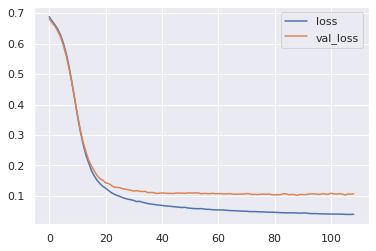

In [38]:
# plotting training and validation loss to check for overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [40]:
pred=(model.predict(x_test,verbose=1)>0.5).astype("int32")

7/7 [==============================] - 0s 1ms/step


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        89
           1       0.94      0.92      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

[[ 83   6]
 [  9 102]]


# Use this to command in the terminal to make predictions. 
curl -d '{"Daily Time Spent on Site":7,"Age":36,"Area Income":700,"Daily Internet Usage":23,"Ad Topic Line":"LOL","City": "Katihar","Male":1,"Country":"India","Timestamp":"2016-03-27 00:53:11"}'  -H "Content-Type: application/json" -X POST http://127.0.0.1:5000